# Jonathan Halverson
# Tuesday, October 31, 2017
# Geron Chapter 10

ANN are at the heart of deep neurel networks, CNN's and recurrent NN's. They can be used for highly complex tasks such as image classification, speech recognition, recommendation engines or beating the world champion at Go. We first cover the perceptron and then use a multilayer perceptron to classify the MNIST data set in Tensorflow

The perceptron is one of the simplest ANN architectures (invented by Frank Rosenblatt). It is based on a LTU or linear threshold unit: step(w_1 x_1 + w_2 x_2 + ... + w_n x_n + b), where step is the Heaviside step function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

(0, 3)

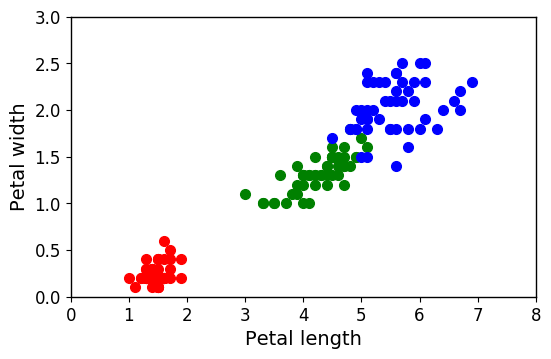

In [3]:
for clr, cls in zip(['red', 'green', 'blue'], np.unique(y)):
     plt.plot(X[y == cls, 0], X[y == cls, 1], 'o', color=clr)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(0, 8)
plt.ylim(0, 3)

The following should fail miserably since the perceptron only converges for linearly separable data:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

In [5]:
std_sc = StandardScaler()
X_std = std_sc.fit_transform(X)

In [6]:
X_std.mean(axis=0), X_std.var(axis=0)

(array([  3.31586610e-16,  -2.84217094e-16]), array([ 1.,  1.]))

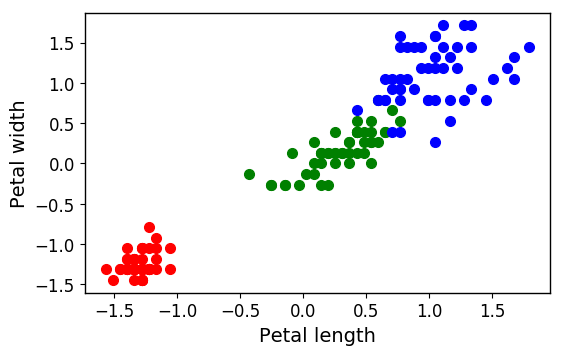

In [7]:
for clr, cls in zip(['red', 'green', 'blue'], np.unique(y)):
     plt.plot(X_std[y == cls, 0], X_std[y == cls, 1], 'o', color=clr)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
#plt.xlim(0, 8)
#plt.ylim(0, 3)

In [8]:
#per_clf = Perceptron(random_state=142, tol=1e-3)
per_clf = Perceptron(random_state=142)
per_clf.fit(X_std, y)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=142,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [9]:
per_clf.score(X_std, y)

0.82666666666666666

We see that the accuracy is low. This is because the algorithm never converged so the resulting fits are not meaningful.

In [10]:
std_sc.transform([[6.1, 2.0]])

array([[ 1.33141568,  1.05353673]])

In [11]:
per_clf.predict(std_sc.transform([[6.1, 2.0]]))

array([2])

In [12]:
per_clf.predict(std_sc.transform([[1.5, 0.25]]))

array([0])

In [13]:
per_clf.predict(std_sc.transform([[4.0, 1.25]]))

array([0])

In [14]:
per_clf.coef_

array([[-1.04708716, -1.05353673],
       [ 3.990456  , -2.23854644],
       [ 2.40807301,  3.27981236]])

In [15]:
per_clf.intercept_

array([-1., -2., -4.])

### High-level API

In [16]:
import tensorflow as tf

In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)

In [19]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_std)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train_std, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11d542d10>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving

SKCompat()

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, dnn_clf.predict(X_train_std)['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/tz/vmnmfncn05xfhb89h953_8_w0000gn/T/tmpK9D4Jq/model.ckpt-40000


1.0

In [21]:
accuracy_score(y_test, dnn_clf.predict(std_sc.transform(X_test))['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/tz/vmnmfncn05xfhb89h953_8_w0000gn/T/tmpK9D4Jq/model.ckpt-40000


0.96666666666666667

### Training a DNN using plain tensorflow

In [22]:
X[0].shape

(64,)

In [23]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [24]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [25]:
def neuron_layer(X, n_neurons, name, activation=None):
     with tf.name_scope('name'):
          n_inputs = int(X.get_shape()[1])
          stddev = 2.0 / np.sqrt(n_inputs)
          init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
          W = tf.Variable(init, name='kernel')
          b = tf.Variable(tf.zeros([n_neurons]), name='bias')
          Z = tf.matmul(X, W) + b
          if activation is None:
               return Z
          else:
               activation(Z)

In [26]:
#with tf.name_scope('dnn'):
#     hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
#     hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
#     logits  = neuron_layer(hidden2, n_outputs, name='outputs')

In [27]:
with tf.name_scope('dnn'):
     hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
     hidden2 = tf.layers.dense(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
     logits  = tf.layers.dense(hidden2, n_outputs, name='outputs')

In [28]:
with tf.name_scope('loss'):
     xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
     loss = tf.reduce_mean(xentropy, name='loss')

In [29]:
learning_rate = 0.01
with tf.name_scope('train'):
     optimizer = tf.train.GradientDescentOptimizer(learning_rate)
     training_op = optimizer.minimize(loss)

In [30]:
with tf.name_scope('eval'):
     correct = tf.nn.in_top_k(logits, y, 1)
     accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [31]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

#### Execution phase

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [33]:
mnist.test.labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
n_epochs = 40
batch_size = 50

In [35]:
with tf.Session() as sess:
     init.run()
     for epoch in xrange(n_epochs):
          for iteration in xrange(mnist.train.num_examples // batch_size):
               X_batch, y_batch = mnist.train.next_batch(batch_size)
               sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
          acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
          acc_test = accuracy.eval(feed_dict={X:mnist.test.images, y:mnist.test.labels})
          print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
     save_path = saver.save(sess, './my_model_final.ckpt')

(0, 'Train accuracy:', 0.94, 'Test accuracy:', 0.90090001)
(1, 'Train accuracy:', 0.98000002, 'Test accuracy:', 0.91680002)
(2, 'Train accuracy:', 0.89999998, 'Test accuracy:', 0.92809999)
(3, 'Train accuracy:', 0.94, 'Test accuracy:', 0.93580002)
(4, 'Train accuracy:', 0.94, 'Test accuracy:', 0.93989998)
(5, 'Train accuracy:', 0.92000002, 'Test accuracy:', 0.9454)
(6, 'Train accuracy:', 0.98000002, 'Test accuracy:', 0.94929999)
(7, 'Train accuracy:', 0.95999998, 'Test accuracy:', 0.95459998)
(8, 'Train accuracy:', 0.95999998, 'Test accuracy:', 0.95450002)
(9, 'Train accuracy:', 0.98000002, 'Test accuracy:', 0.95679998)
(10, 'Train accuracy:', 0.98000002, 'Test accuracy:', 0.9587)
(11, 'Train accuracy:', 0.94, 'Test accuracy:', 0.9605)
(12, 'Train accuracy:', 0.94, 'Test accuracy:', 0.96310002)
(13, 'Train accuracy:', 0.98000002, 'Test accuracy:', 0.96450001)
(14, 'Train accuracy:', 0.95999998, 'Test accuracy:', 0.96560001)
(15, 'Train accuracy:', 0.95999998, 'Test accuracy:', 0.965799

In [41]:
np.random.seed(42)
rand_image = np.arange(784)
np.random.shuffle(rand_image)
with tf.Session() as sess:
     saver.restore(sess, './my_model_final.ckpt')     
     X_new_scaled = [rand_image / rand_image.max()]
     Z = logits.eval(feed_dict={X:X_new_scaled})
     y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [42]:
y_pred

array([8])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

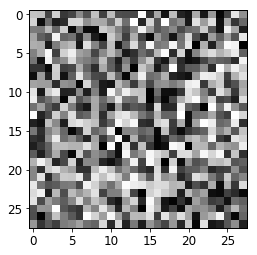

In [46]:
plt.imshow(rand_image.reshape(28, 28), cmap=plt.cm.gray)

#### Fine-tuning neural network hyperparameters

NN are very flexible which makes them hard to optimize. Not only can the topology or architecture be changed but the number of hidden layers, number of neurons per layer, weight initialization, activation functions, regularization, etc. This problem is compounded by the fact that an enormous amount of data is needed to train the network so the optimization procedure is expensive. Oscar may be used for this purpose.

For many problems one can begin with a large, single hidden layer and pretty good results will be obtained. However, going to multiple layers with the same number of overall neurons tends to lead to better performance. This approach is essential for complicated problems because it allows the features or patterns on the hierarchy of scales to be learned. Tens or hundreds of hidden layers are needed for complicated tasks. As the number of layers (and neurons) increases, the likelihood of overfitting increases.

A common practice for the number of neurons per layer is to use a funnel approach. That is, decrease the number of neurons per layer in the downstrown direction. One can also keep the number of neurons the same in all layers and simply optimize the number of layers. Finding the optimal values is a black art. One can also use the "stretch pants" approach where the number of neurons per layer is high and dropout is used to avoid overfitting.